# COMBINED HEAT & POWER PLANT (CHP):

Combined heat and power (CHP) systems, also known as cogeneration, generate electricity and useful thermal energy in a single, integrated system. CHP is not a technology, but an approach to applying technologies. Heat that is normally wasted in conventional power generation is recovered as useful energy, which avoids the losses that would otherwise be incurred from separate generation of heat and power. While the conventional method of producing usable heat and power separately has a typical combined efficiency of 45 percent, CHP systems can operate at levels as high as 80 percent.The following Fig. shows the flow diagram of a CHP unit.

### Feed-Forward Neural Network

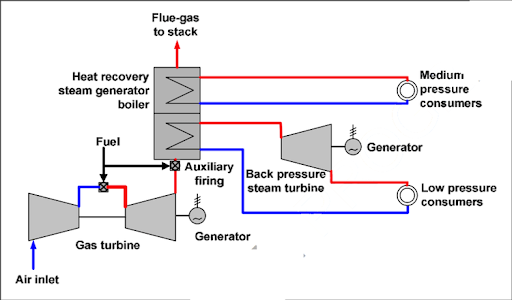

In [1]:
from IPython.display import Image, display

display(Image(filename = "../img.png", width=654, height=474))

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb


df = pd.read_excel('../chp.xlsx')
df.isnull().sum()             #check data-sey for null values

/home/sasan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sasan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/sasan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Ambient_T            0
Exhaust_Volume       0
Atmospheric_P        0
Relative Humidity    0
Electric_Power       0
dtype: int64

In [3]:
df.head()

,Ambient_T,Exhaust_Volume,Atmospheric_P,Relative Humidity,Electric_Power
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient_T,47840.0,19.651231,7.452162,1.81,13.5100,20.345,25.72,37.11
Exhaust_Volume,47840.0,54.305804,12.707362,25.36,41.7400,52.080,66.54,81.56
Atmospheric_P,47840.0,1013.259078,5.938535,992.89,1009.1000,1012.940,1017.26,1033.30
Relative Humidity,47840.0,73.308978,14.599658,25.56,63.3275,74.975,84.83,100.16
Electric_Power,47840.0,454.365009,17.066281,420.26,439.7500,451.550,468.43,495.76


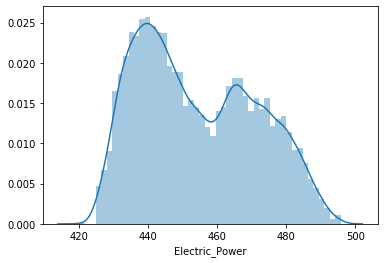

In [5]:
sb.distplot(df['Electric_Power'])

In [6]:
df.corr()['Electric_Power'].sort_values()         #digging for correlations

Ambient_T           -0.948128
Exhaust_Volume      -0.869780
Relative Humidity    0.389794
Atmospheric_P        0.518429
Electric_Power       1.000000
Name: Electric_Power, dtype: float64

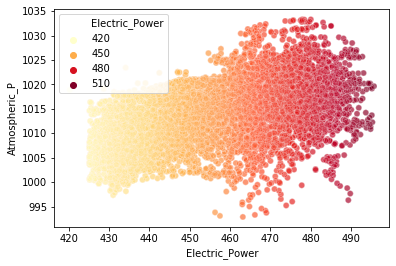

In [7]:
sb.scatterplot(x='Electric_Power', y='Atmospheric_P', data=df,
               alpha=0.2, palette='YlOrRd', hue='Electric_Power')

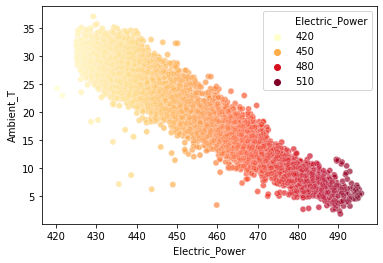

In [8]:
sb.scatterplot(x='Electric_Power', y='Ambient_T', data=df,
               alpha=0.2, palette='YlOrRd', hue='Electric_Power')

In [9]:
X = df.drop('Electric_Power', axis=1).values
y = df['Electric_Power'].values

In [10]:
from sklearn.model_selection import train_test_split

/home/sasan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


The original data set is broken 80% to 20% for aquiring a test set. data points are selected randomly.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_attribs = list()
pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


full_pipeline = ColumnTransformer([
        ("num", pipeline, num_attribs)])

numpy.ndarray

In [13]:
import tensorflow as tf

class chpCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))

model.compile(optimzer='adam', loss='mse', metrics=['accuracy'])


In [15]:
callbacks = chpCallback()
model.fit(x=X_train, y=y_train, epochs=200,
          batch_size=256, validation_data=(X_test, y_test), callbacks=[callbacks])

Train on 38272 samples, validate on 9568 samples
Epoch 1/200
38272/38272 [==============================] - 4s 104us/sample - loss: 206058.8848 - accuracy: 0.0000e+00 - val_loss: 205434.8750 - val_accuracy: 0.0000e+00
Epoch 2/200
38272/38272 [==============================] - 1s 30us/sample - loss: 203311.1225 - accuracy: 0.0000e+00 - val_loss: 200717.3420 - val_accuracy: 0.0000e+00
Epoch 3/200
38272/38272 [==============================] - 1s 28us/sample - loss: 196323.3404 - accuracy: 0.0000e+00 - val_loss: 190854.6972 - val_accuracy: 0.0000e+00
Epoch 4/200
38272/38272 [==============================] - 1s 31us/sample - loss: 182785.3095 - accuracy: 0.0000e+00 - val_loss: 172712.7218 - val_accuracy: 0.0000e+00
Epoch 5/200
38272/38272 [==============================] - 1s 31us/sample - loss: 160339.6185 - accuracy: 0.0000e+00 - val_loss: 143292.1813 - val_accuracy: 0.0000e+00
Epoch 6/200
38272/38272 [==============================] - 1s 36us/sample - loss: 129217.7635 - accuracy: 0.00

38272/38272 [==============================] - 5s 141us/sample - loss: 19744.2812 - accuracy: 0.0000e+00 - val_loss: 2723.8435 - val_accuracy: 0.0000e+00
Epoch 99/200
38272/38272 [==============================] - 7s 182us/sample - loss: 19634.9945 - accuracy: 0.0000e+00 - val_loss: 2392.6540 - val_accuracy: 0.0000e+00
Epoch 100/200
38272/38272 [==============================] - 6s 161us/sample - loss: 20157.0073 - accuracy: 0.0000e+00 - val_loss: 2501.2040 - val_accuracy: 0.0000e+00
Epoch 101/200
38272/38272 [==============================] - 6s 162us/sample - loss: 19944.8898 - accuracy: 0.0000e+00 - val_loss: 2467.2449 - val_accuracy: 0.0000e+00loss: 19892.3626  - ETA: 0s - loss: 19957.6523 - accuracy: 0.0000e+
Epoch 102/200
38272/38272 [==============================] - 6s 153us/sample - loss: 19527.4980 - accuracy: 0.0000e+00 - val_loss: 2366.8779 - val_accuracy: 0.0000e+00
Epoch 103/200
38272/38272 [==============================] - 6s 157us/sample - loss: 19637.7616 - accuracy: 

38272/38272 [==============================] - 5s 131us/sample - loss: 18432.3653 - accuracy: 0.0000e+00 - val_loss: 1847.0572 - val_accuracy: 0.0000e+00
Epoch 193/200
38272/38272 [==============================] - 6s 154us/sample - loss: 18342.3692 - accuracy: 0.0000e+00 - val_loss: 1957.7704 - val_accuracy: 0.0000e+00
Epoch 194/200
38272/38272 [==============================] - 5s 119us/sample - loss: 18353.8423 - accuracy: 0.0000e+00 - val_loss: 1918.8053 - val_accuracy: 0.0000e+00
Epoch 195/200
38272/38272 [==============================] - 5s 127us/sample - loss: 18238.2426 - accuracy: 0.0000e+00 - val_loss: 1943.7251 - val_accuracy: 0.0000e+00
Epoch 196/200
38272/38272 [==============================] - 6s 161us/sample - loss: 18494.8711 - accuracy: 0.0000e+00 - val_loss: 1849.6206 - val_accuracy: 0.0000e+00
Epoch 197/200
38272/38272 [==============================] - 6s 152us/sample - loss: 18263.5885 - accuracy: 0.0000e+00 - val_loss: 1864.7982 - val_accuracy: 0.0000e+00
Epoch 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  20        
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  30        
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  28        
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  5

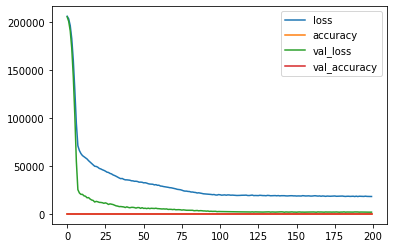

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [18]:
model.save('chp_mlp2.h5')

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

x = np.arange(0,100) 
a=list(X_train.iloc[:100])
b=list(forest_reg.predict(full_pipeline.fit_transform(chping.iloc[:100])))
plt.figure(figsize=(15,10))
plt.plot(x, a,"g-", label="Measured")
plt.plot(x, b,"b-", label="Predicted")
plt.legend(loc='upper left')
#plt.plot(x, a,"g-", label="Measured", x, b,"b-", label="Predicted")